<a href="https://colab.research.google.com/github/akulkarni14/AAI-praticals/blob/main/PR5_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Learned Policy Grid:
R R D D D
R R R R D
D X X R D
D D R D D
R R R R G


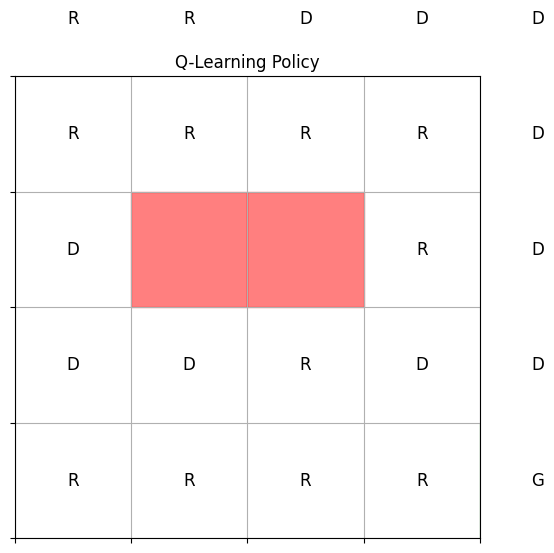

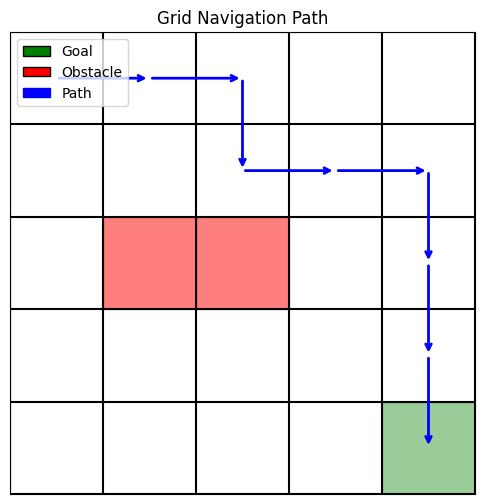

Shortest path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ------------------------ Configuration ------------------------
grid_size = 5
start = (0, 0)
goal = (4, 4)
obstacles = [(2, 1), (2, 2)]

actions = ['U', 'D', 'L', 'R']
action_mapping = {
    'U': (-1, 0),
    'D': (1, 0),
    'L': (0, -1),
    'R': (0, 1)
}

# ------------------------ Helpers ------------------------
def is_valid(state):
    x, y = state
    return 0 <= x < grid_size and 0 <= y < grid_size and state not in obstacles

# ------------------------ Q-Learning ------------------------
q_table = np.zeros((grid_size, grid_size, len(actions)))
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 500

for _ in range(episodes):
    state = start
    while state != goal:
        x, y = state
        if random.random() < epsilon:
            action_index = random.randint(0, len(actions) - 1)
        else:
            action_index = np.argmax(q_table[x, y])

        action = actions[action_index]
        dx, dy = action_mapping[action]
        new_state = (x + dx, y + dy)
        if not is_valid(new_state):
            new_state = state

        reward = 1 if new_state == goal else -0.1
        nx, ny = new_state
        q_table[x, y, action_index] += alpha * (
            reward + gamma * np.max(q_table[nx, ny]) - q_table[x, y, action_index]
        )
        state = new_state

# ------------------------ Policy Grid ------------------------
policy_grid = [['' for _ in range(grid_size)] for _ in range(grid_size)]
for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) == goal:
            policy_grid[i][j] = 'G'
        elif (i, j) in obstacles:
            policy_grid[i][j] = 'X'
        else:
            best_action = np.argmax(q_table[i, j])
            policy_grid[i][j] = actions[best_action]

# ------------------------ Print Policy Grid ------------------------
print("\nLearned Policy Grid:")
for row in policy_grid:
    print(' '.join(row))

# ------------------------ Plot Policy Grid ------------------------
plt.figure(figsize=(6, 6))
for i in range(grid_size):
    for j in range(grid_size):
        char = policy_grid[i][j]
        if char == 'G':
            plt.gca().add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, color='green', alpha=0.4))
            plt.text(j + 0.5, grid_size - i - 0.5, 'G', ha='center', va='center', fontsize=12)
        elif char == 'X':
            plt.gca().add_patch(plt.Rectangle((j, grid_size - i - 1), 1, 1, color='red', alpha=0.5))
        else:
            plt.text(j + 0.5, grid_size - i - 0.5, char, ha='center', va='center', fontsize=12)

plt.xticks(np.arange(0, grid_size, 1))
plt.yticks(np.arange(0, grid_size, 1))
plt.grid(True)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.title("Q-Learning Policy")
plt.show()

# ------------------------ Trace and Plot Shortest Path ------------------------
path = [start]
state = start
while state != goal:
    x, y = state
    best_a = np.argmax(q_table[x, y])
    dx, dy = action_mapping[actions[best_a]]
    next_state = (x + dx, y + dy)
    if not is_valid(next_state) or next_state in path:
        break  # avoid loops
    path.append(next_state)
    state = next_state

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Grid Navigation Path")

# Draw grid
for i in range(grid_size + 1):
    ax.plot([0, grid_size], [i, i], color='black')
    ax.plot([i, i], [0, grid_size], color='black')

# Draw obstacles
for ox, oy in obstacles:
    rect = plt.Rectangle((oy, grid_size - ox - 1), 1, 1, color='red', alpha=0.5)
    ax.add_patch(rect)

# Draw goal
gx, gy = goal
rect = plt.Rectangle((gy, grid_size - gx - 1), 1, 1, color='green', alpha=0.4)
ax.add_patch(rect)

# Draw path arrows
for (x1, y1), (x2, y2) in zip(path, path[1:]):
    ax.annotate(
        '',
        xy=(y2 + 0.5, grid_size - x2 - 0.5),
        xytext=(y1 + 0.5, grid_size - x1 - 0.5),
        arrowprops=dict(arrowstyle='->', color='blue', lw=2)
    )

# Legend
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Goal'),
    Patch(facecolor='red', edgecolor='black', label='Obstacle'),
    Patch(facecolor='blue', edgecolor='blue', label='Path')
]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# ------------------------ Print Path ------------------------
print("Shortest path:", path)
